## <strong>Cardiovascular disease prediction

## <font size=3> The first part is to import the database 'heart.csv' and the required libraries

In [1]:
import pandas as pandas
import matplotlib.pyplot as plt
import seaborn as sea
import os
import warnings

%matplotlib inline
print(os.listdir())
warnings.filterwarnings('ignore')

['.idea', '.ipynb_checkpoints', 'heart.csv', 'prediction.ipynb', 'venv']


## <font size=3> The dataset is the same as in RapidMiner.

In [2]:
dataset = pandas.read_csv("heart.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Checking if there is a satisfied number of rows and columns

In [4]:
dataset.shape

(303, 14)

#### <font size=3> This is a test just to see if it will output the dataset.

#### <font size=2> The first output are the first ten rows, whereas the second one are random five rows.

In [5]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
148,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1


#### Description of the dataset

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   cp         303 non-null    int64  
 3   trestbps   303 non-null    int64  
 4   chol       303 non-null    int64  
 5   fbs        303 non-null    int64  
 6   restecg    303 non-null    int64  
 7   thalach    303 non-null    int64  
 8   exang      303 non-null    int64  
 9   oldpeak    303 non-null    float64
 10  slope      303 non-null    int64  
 11  ca         303 non-null    int64  
 12  thal       303 non-null    int64  
 13  diagnosis  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'diagnosis'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

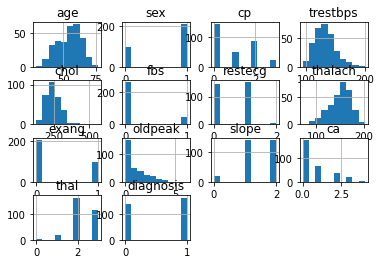

In [9]:
dataset.hist()

#### Values of attributes

In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#####  --------------------------------
##### As our main attribute is 'diagnosis', its description comes now:

In [11]:
dataset["diagnosis"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

In [12]:
dataset["diagnosis"].unique()


array([1, 0], dtype=int64)

#### --------------------------------
##### Correlation between target and other attributes

In [13]:
print(dataset.corr()["diagnosis"].abs().sort_values(ascending=False))

diagnosis    1.000000
exang        0.436757
cp           0.433798
oldpeak      0.430696
thalach      0.421741
ca           0.391724
slope        0.345877
thal         0.344029
sex          0.280937
age          0.225439
trestbps     0.144931
restecg      0.137230
chol         0.085239
fbs          0.028046
Name: diagnosis, dtype: float64


#### This shows that most attributes are moderately correlated with diagnosis, but 'fbs' is very weakly correlated.
#### However, there is no attribute with a strong correlation.

#### --------------------------------
## Detailed Attribute Analysis

#### The main attribute is analyzed first.

1    165
0    138
Name: diagnosis, dtype: int64


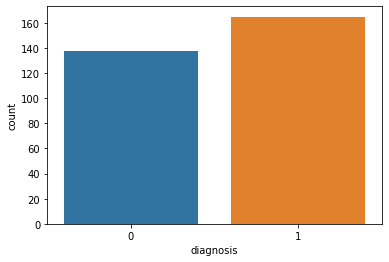

In [14]:
y = dataset["diagnosis"]

sea.countplot(y)


target_temp = dataset.diagnosis.value_counts()

print(target_temp)

In [15]:
print("People without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("People with heart problems: "+str(round(target_temp[1]*100/303,2)))


People without heart problems: 45.54
People with heart problems: 54.46


#### --------------------------------
### 'Sex' attribute

In [16]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

##### There are two options, male and female (did not want to calculate with other new genders :D)

<AxesSubplot:xlabel='sex', ylabel='diagnosis'>

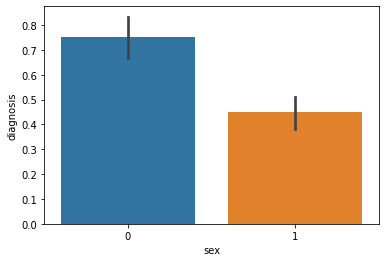

In [17]:
sea.barplot(dataset["sex"],y)

##### Women are more likely to have heart problems than men

#### --------------------------------
### 'Chest Pain Type' attribute

In [18]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

#### CP has values 0,1,2,3

<AxesSubplot:xlabel='cp', ylabel='diagnosis'>

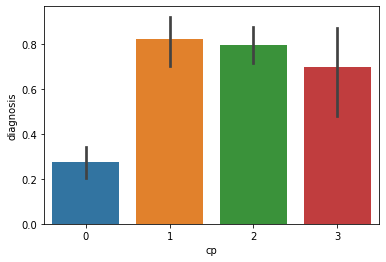

In [19]:
sea.barplot(dataset["cp"],y)

##### When cp is equal to 0, it means that people with typical angina are much less likely to have heart problems

#### --------------------------------
### FBS attribute

In [20]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [21]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='diagnosis'>

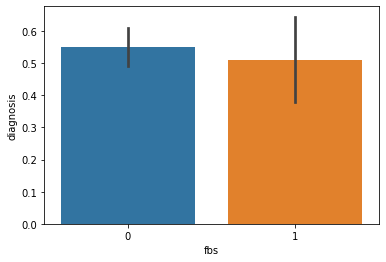

In [22]:
sea.barplot(dataset["fbs"],y)

#### --------------------------------
### Restecg attribute

In [23]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='diagnosis'>

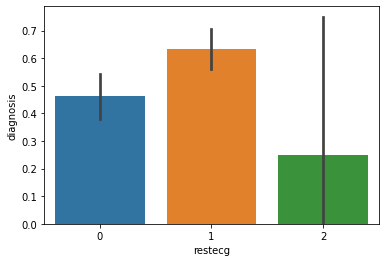

In [24]:
sea.barplot(dataset["restecg"],y)

##### People with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

#### --------------------------------
### Exang attribute

In [25]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='diagnosis'>

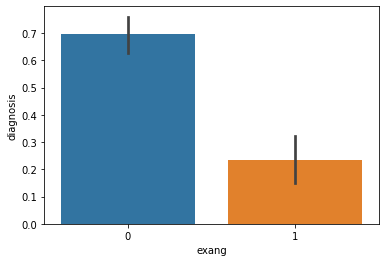

In [26]:
sea.barplot(dataset["exang"],y)

##### People with exang = 1 (exercise induced angina) are much less likely to have heart problems

#### --------------------------------
### Slope attribute

In [27]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='diagnosis'>

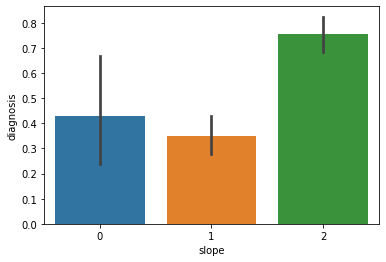

In [28]:
sea.barplot(dataset["slope"],y)

##### Slope = 2 causes heart pain the most.

#### --------------------------------
### Ca attribute

In [29]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

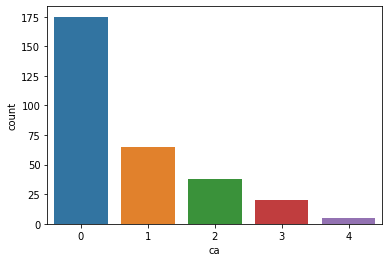

In [30]:
sea.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='diagnosis'>

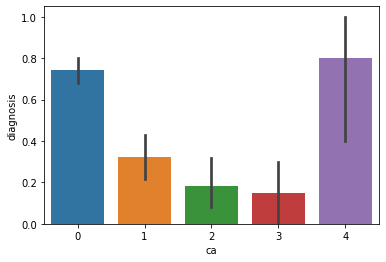

In [31]:
sea.barplot(dataset["ca"],y)


#### --------------------------------
### Thal attribute

In [32]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='diagnosis'>

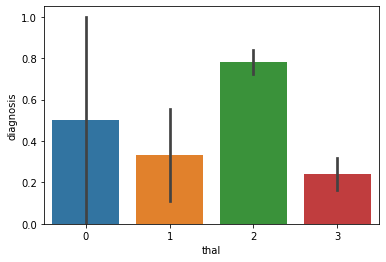

In [33]:
sea.barplot(dataset["thal"],y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

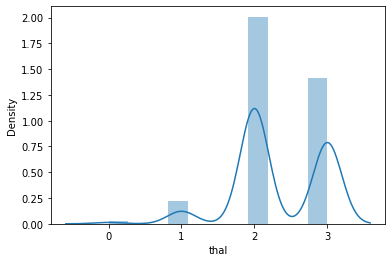

In [34]:
sea.distplot(dataset["thal"])

### --------------------------------
### Train-Test split (test 20% - training 80%)

In [35]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("diagnosis",axis=1)
target = dataset["diagnosis"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [36]:
X_train.shape

(242, 13)

In [37]:
X_test.shape

(61, 13)

In [38]:
Y_train.shape

(242,)

In [39]:
Y_test.shape

(61,)

### --------------------------------
## <font size=4> Classification methods - KNN, Naive Bayes, Decision Tree

In [40]:
from sklearn.metrics import accuracy_score


### --------------------------------
### Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)

In [42]:
Y_pred_nb.shape

(61,)

In [43]:
naive_bayes = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score with Naive Bayes is: "+str(naive_bayes)+" %")


The accuracy score with Naive Bayes is: 85.25 %


### --------------------------------
### K-Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [45]:
Y_pred_knn.shape

(61,)

In [46]:
nearest_neighbor = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score with KNN is: "+str(nearest_neighbor)+" %")

The accuracy score with KNN is: 67.21 %


### --------------------------------
### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

accuracy_dt = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if current_accuracy>accuracy_dt:
        accuracy_dt = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [48]:
print(Y_pred_dt.shape)

(61,)


In [49]:
decision_tree = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score with Decision Tree is: "+str(decision_tree)+" %")

The accuracy score with Decision Tree is: 81.97 %


### --------------------------------
## Evaluation

In [50]:
methods = ["Naive Bayes","K-Nearest Neighbors","Decision Tree"]
results = [naive_bayes,nearest_neighbor,decision_tree]

for i in range(len(methods)):
    print("The accuracy using "+methods[i]+" is: "+str(results[i])+" %")

The accuracy using Naive Bayes is: 85.25 %
The accuracy using K-Nearest Neighbors is: 67.21 %
The accuracy using Decision Tree is: 81.97 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

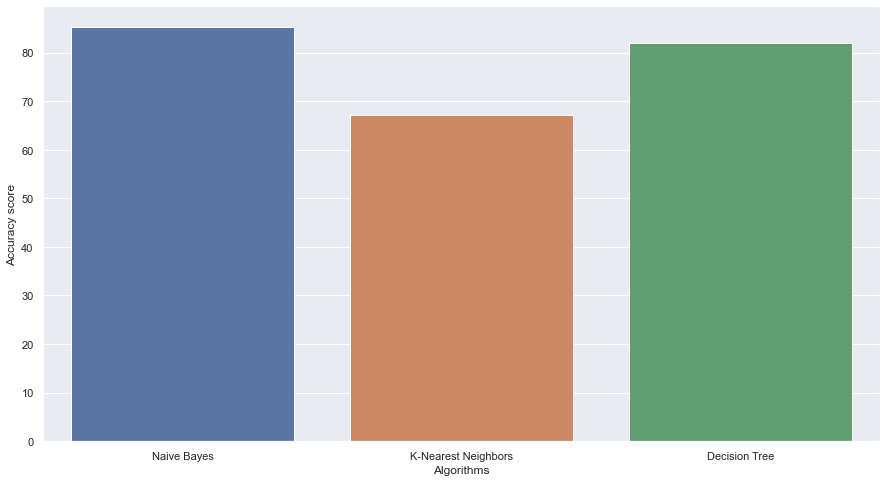

In [51]:
sea.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sea.barplot(methods,results)

### --------------------------------
#### To conclude, I managed to inspect and check the dataset and its attributes in detail using Python.
#### In the end, it showed that Naive Bayes is the best classifier for finding if a person has the disease.
### --------------------------------